# Trabalho em grupo - Ana Luisa, Ananda e Luis

## - HIPOTESE: Como a economia afeta o setor publico e privado de maneiras diferentes

## - Dataset: [BRICS - World Bank Indicator](https://www.kaggle.com/arslanali4343/real-estate-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Importando os datasets e abrindo para ver o conteúdo:

In [2]:
df_economy = pd.read_csv('data/BRICS Development Indicators/Economy_Data.csv', sep= ';')
df_private_sector = pd.read_csv('data/BRICS Development Indicators/PrivateSector_Data.csv', sep=';')
df_public_sector = pd.read_csv('data/BRICS Development Indicators/PublicSector_Indicators.csv', sep=';')

### a) ECONOMY dataset information:
- count: 86500
- valores nulos? SIM
- linhas completas: 60348 ( depois do `dropna` )

In [3]:
df_economy.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,1970.0,NaN
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,1970.0,NaN
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,1970.0,NaN
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,1970.0,NaN
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,1970.0,NaN


In [4]:
df_economy.isnull().sum()

SeriesName       150
SeriesCode       250
CountryName      250
CountryCode      250
Year               0
Value          26152
dtype: int64

In [5]:
df_economy.describe()

,Year,Value
count,86500.000000,6.034800e+04
mean,1994.500000,1.567603e+12
std,14.430953,8.948589e+12
min,1970.000000,-7.018725e+12
25%,1982.000000,1.336501e+01
50%,1994.500000,3.354500e+07
75%,2007.000000,8.238063e+10
max,2019.000000,2.083713e+14


In [6]:
# removendo qualquer linha duplicada e linhas que contém valores nulos
df_economy = df_economy.drop_duplicates().dropna()

### b) PRIVATE SETOR dataset information:
- count: 42250
- valores nulos? SIM
- linhas completas: 17420

In [7]:
df_private_sector.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,11.895098
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,1970.0,NaN
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,1970.0,5.556494
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,1970.0,NaN
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,1970.0,NaN


In [8]:
df_private_sector.isnull().sum()

SeriesName       150
SeriesCode       250
CountryName      250
CountryCode      250
Year               0
Value          24830
dtype: int64

In [9]:
df_private_sector.describe()

,Year,Value
count,42250.00000,1.742000e+04
mean,1994.50000,1.159949e+10
std,14.43104,1.057388e+11
min,1970.00000,0.000000e+00
25%,1982.00000,4.474096e+00
50%,1994.50000,1.660000e+01
75%,2007.00000,8.529821e+01
max,2019.00000,2.501330e+12


In [10]:
# removendo linhas duplicada e linhas que contém valores nulos
df_private_sector = df_private_sector.drop_duplicates().dropna()

### c) PUBLIC SECTOR dataset information:
- count: 81500
- valores nulos? SIM
- linhas completas: 26838

In [11]:
df_public_sector.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,Brazil,BRA,1970.0,NaN
1,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,China,CHN,1970.0,NaN
2,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,India,IND,1970.0,NaN
3,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,Russian Federation,RUS,1970.0,NaN
4,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,South Africa,ZAF,1970.0,NaN


In [12]:
df_public_sector.isnull().sum()

SeriesName       150
SeriesCode       250
CountryName      250
CountryCode      250
Year               0
Value          54662
dtype: int64

In [13]:
df_public_sector.describe()

,Year,Value
count,81500.000000,2.683800e+04
mean,1994.500000,1.302336e+11
std,14.430958,1.266955e+12
min,1970.000000,-4.567250e+12
25%,1982.000000,1.010542e+01
50%,1994.500000,4.312820e+01
75%,2007.000000,5.883250e+03
max,2019.000000,5.651790e+13


In [14]:
# removendo linhas duplicadas e linhas com valores nulos
df_public_sector = df_public_sector.drop_duplicates().dropna()

## 2) Agrupando os paises 
### a) usando o dataset ECONOMY

In [15]:
df_economy.groupby(by='CountryCode').sum().drop(columns=['Year'])


,Value
CountryCode,
BRA,3.171796e+15
CHN,1.811189e+16
IND,4.218353e+16
RUS,2.935328e+16
ZAF,1.781179e+15


### * Temos informações ECONÔMICAS de apenas 5 países

## Plotando os gráficos dos valores de cada país ao longo dos anos:

<AxesSubplot:title={'center':'ECONOMY - SOUTH AFRICA'}, xlabel='Year'>

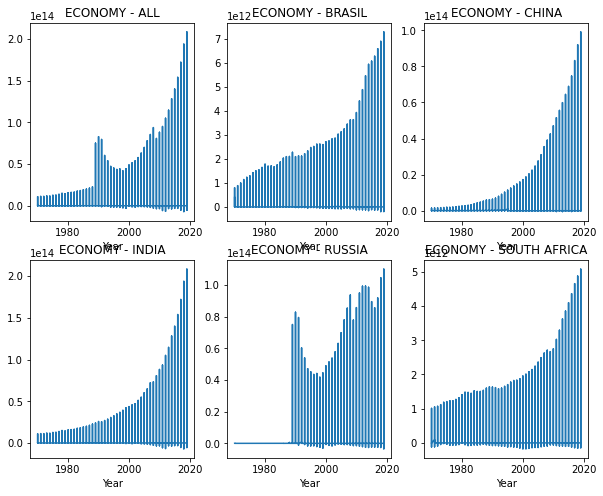

In [16]:
# definindo as configurações dos graficos na mesma página e tamanho da figura
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# plotando as informações de todos os paises de todos os anos
df_economy.plot(x='Year', y='Value', title='ECONOMY - ALL', figsize=(10,8), ax=ax[0,0], legend=False)

# Plotando o gráfico linear dos valores economicos do BRASIL
df_economy[df_economy['CountryCode']=='BRA'].plot(x='Year', y='Value', title='ECONOMY - BRASIL', ax=ax[0, 1], legend=False)

# Plotando o gráfico linear dos valores economicos da CHINA
df_economy[df_economy['CountryCode']=='CHN'].plot(x='Year', y='Value', title='ECONOMY - CHINA', ax=ax[0, 2], legend=False)

# Plotando o gráfico linear dos valores economicos do INDIA
df_economy[df_economy['CountryCode']=='IND'].plot(x='Year', y='Value', title='ECONOMY - INDIA', ax=ax[1, 0], legend=False)

# Plotando o gráfico linear dos valores economicos da RUSSIA
df_economy[df_economy['CountryCode']=='RUS'].plot(x='Year', y='Value', title='ECONOMY - RUSSIA', ax=ax[1, 1], legend=False)

# Plotando o gráfico linear dos valores economicos da SOUTH AFRICA	
df_economy[df_economy['CountryCode']=='ZAF'].plot(x='Year', y='Value', title='ECONOMY - SOUTH AFRICA', ax=ax[1, 2], legend=False)

## -  Os gráficos nos mostram que: 
- no geral, os países tiveram um crescimento quase exponencial ao longo dos anos;
- RUSSIA: apresentou uma queda próximo do ano 2000, mas depois voltou a crescer;
- BRASIL, CHINA, INDIA e AFRICA DO SUL: Alavancaram após os anos 2000.

### b) usando o dataset PRIVATE SECTOR

In [17]:
df_private_sector.groupby(by='CountryCode').sum().drop(columns=['Year'])

,Value
CountryCode,
BRA,1.835112e+13
CHN,1.229084e+14
IND,2.601728e+13
RUS,2.611897e+13
ZAF,8.667364e+12


<AxesSubplot:title={'center':'PRIVATE SECTOR - SOUTH AFRICA'}, xlabel='Year'>

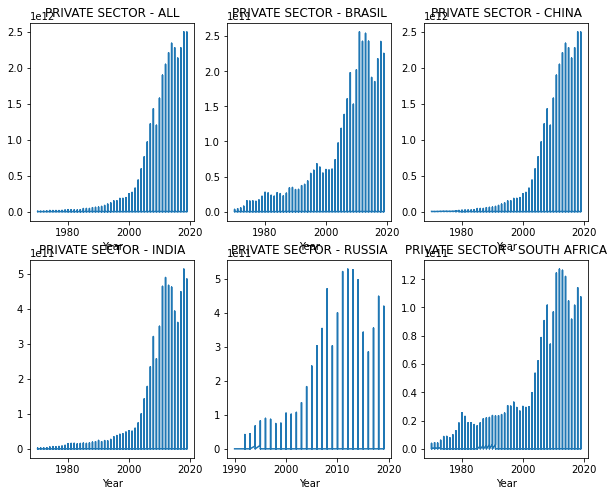

In [18]:
# definindo as configurações dos graficos na mesma página e tamanho da figura
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# plotando as informações de todos os paises de todos os anos
df_private_sector.plot(x='Year', y='Value', title='PRIVATE SECTOR - ALL', figsize=(10,8), ax=ax[0,0], legend=False)

# Plotando o gráfico linear dos valores economicos do BRASIL
df_private_sector[df_private_sector['CountryCode']=='BRA'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - BRASIL', ax=ax[0, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da CHINA
df_private_sector[df_private_sector['CountryCode']=='CHN'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - CHINA', ax=ax[0, 2], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos do INDIA
df_private_sector[df_private_sector['CountryCode']=='IND'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - INDIA', ax=ax[1, 0], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da RUSSIA
df_private_sector[df_private_sector['CountryCode']=='RUS'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - RUSSIA', ax=ax[1, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da SOUTH AFRICA	
df_private_sector[df_private_sector['CountryCode']=='ZAF'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - SOUTH AFRICA', ax=ax[1, 2], 
                                                                legend=False)

## -  Os gráficos nos mostram que: 
- A tenência geral é crescente após 2000, mas com alguns baixos ao longo dos anos;
- Russia não tem informações de antes de 1990, ou seja, menos que os outros países;

### c) usando o dataset PUBLIC SECTOR

In [19]:
df_public_sector.groupby(by='CountryCode').sum().drop(columns=['Year'])

,Value
CountryCode,
BRA,1.306499e+14
CHN,2.651023e+14
IND,1.645531e+15
RUS,1.361828e+15
ZAF,9.209841e+13


<AxesSubplot:title={'center':'PUBLIC SECTOR - SOUTH AFRICA'}, xlabel='Year'>

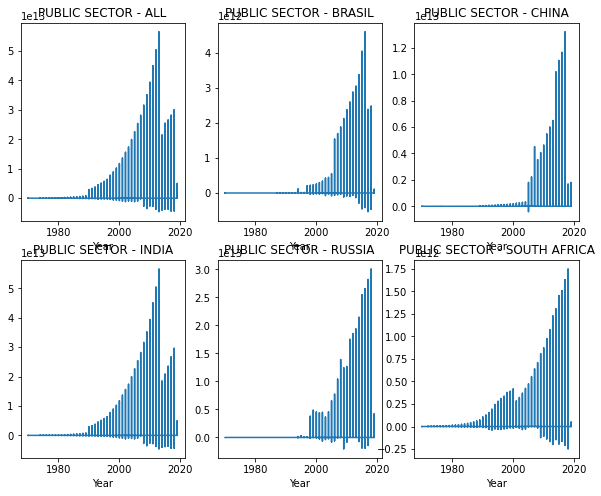

In [20]:
# definindo as configurações dos graficos na mesma página e tamanho da figura
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# plotando as informações de todos os paises de todos os anos
df_public_sector.plot(x='Year', y='Value', title='PUBLIC SECTOR - ALL', figsize=(10,8), ax=ax[0,0], legend=False)

# Plotando o gráfico linear dos valores economicos do BRASIL
df_public_sector[df_public_sector['CountryCode']=='BRA'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - BRASIL', ax=ax[0, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da CHINA
df_public_sector[df_public_sector['CountryCode']=='CHN'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - CHINA', ax=ax[0, 2], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos do INDIA
df_public_sector[df_public_sector['CountryCode']=='IND'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - INDIA', ax=ax[1, 0], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da RUSSIA
df_public_sector[df_public_sector['CountryCode']=='RUS'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - RUSSIA', ax=ax[1, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da SOUTH AFRICA	
df_public_sector[df_public_sector['CountryCode']=='ZAF'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - SOUTH AFRICA', ax=ax[1, 2], 
                                                                legend=False)

## -  Os gráficos nos mostram que: 
- Para o setor publico, não temos informações de antes de 1990;
- No geral, é observada a mesma tendência de crescimento após os anos 2000 em todos os países.

---

## 3) Criando Data Frames

In [21]:
df_eco_mult = df_economy[["CountryName", "Year", "Value"]].groupby(["CountryName", "Year"]).mean()
df_eco_mult.rename(columns={"Value" : "Economy.Value"}, inplace=True)
df_eco_mult.head()

Economy.Value
CountryName Year                 
Brazil      1970.0   4.388201e+10
            1971.0   4.801289e+10
            1972.0   5.340986e+10
            1973.0   6.158197e+10
            1974.0   6.799576e+10

In [22]:
df_pub_mult = df_public_sector[["CountryName", "Year", "Value"]].groupby(["CountryName", "Year"]).mean()
df_pub_mult.rename(columns={"Value" : "Public.Value"}, inplace=True)
df_pub_mult.head()

Public.Value
CountryName Year                
Brazil      1970.0  6.256171e+07
            1971.0  1.260172e+08
            1972.0  1.558517e+08
            1973.0  1.116170e+08
            1974.0  2.316899e+08

In [23]:
df_priv_mult = df_private_sector[["CountryName", "Year", "Value"]].groupby(["CountryName", "Year"]).mean()
df_priv_mult.rename(columns={"Value" : "Private.Value"}, inplace=True)
df_priv_mult.head()

Private.Value
CountryName Year                 
Brazil      1970.0   3.097460e+08
            1971.0   3.669270e+08
            1972.0   4.875410e+08
            1973.0   7.323483e+08
            1974.0   1.233883e+09

In [24]:
df_list = [df_pub_mult, df_priv_mult, df_eco_mult]

In [25]:
df_mult_values = pd.concat(df_list, axis=1)
df_mult_values

Public.Value  Private.Value  Economy.Value
CountryName  Year                                              
Brazil       1970.0  6.256171e+07   3.097460e+08   4.388201e+10
             1971.0  1.260172e+08   3.669270e+08   4.801289e+10
             1972.0  1.558517e+08   4.875410e+08   5.340986e+10
             1973.0  1.116170e+08   7.323483e+08   6.158197e+10
             1974.0  2.316899e+08   1.233883e+09   6.799576e+10
...                           ...            ...            ...
South Africa 2015.0  3.496929e+10   3.321550e+09   2.646045e+11
             2016.0  3.753805e+10   2.760396e+09   2.728005e+11
             2017.0  3.805993e+10   3.473878e+09   2.845282e+11
             2018.0  4.376323e+10   3.560815e+09   2.953732e+11
             2019.0  4.516259e+08   3.472331e+09   4.117172e+11

[250 rows x 3 columns]

In [26]:
df_public_value = df_public_sector.groupby(by='Year', as_index=False).sum()

In [27]:
df_private_value = df_private_sector.groupby(by='Year', as_index=False).sum()

In [28]:
df_economy_value = df_economy.groupby(by='Year', as_index=False).sum()

In [29]:
df_all_values = pd.DataFrame()

In [30]:
df_all_values['Year'] = df_public_value['Year']
df_all_values['Public'] = df_public_value['Value']
df_all_values['Private'] = df_private_value['Value']
df_all_values['Economy'] = df_economy_value['Value']

In [31]:
df_all_values.head()

,Year,Public,Private,Economy
0,1970.0,1.980862e+10,3.525468e+10,1.181739e+14
1,1971.0,2.469150e+10,3.928186e+10,1.229109e+14
2,1972.0,4.258740e+10,4.648529e+10,1.248427e+14
3,1973.0,4.683973e+10,6.783082e+10,1.321507e+14
4,1974.0,4.439112e+11,1.033460e+11,1.356756e+14


## 4) Profile Report

In [32]:
# pip install pandas-profiling

In [33]:
from pandas_profiling import ProfileReport

In [34]:
profile_all = ProfileReport(df_all_values)

In [35]:
profile_all

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5) Regressões

### Normalizando

In [2]:
from sklearn.preprocessing import StandardScaler

### Particionando treino e teste

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X = df_all_values.loc[:,['Public', 'Private']]
y = df_all_values.loc[:,['Economy']]

NameError: name 'df_all_values' is not defined

In [75]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Implementando regressões

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#### Procurando melhor número de vizinhos

In [78]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [79]:
mse_val = [] #to store rmse values for different k

for K in range(1, 20):
#     K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights='uniform')

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))/K #calculate rmse
    mse_val.append(error) #store rmse values

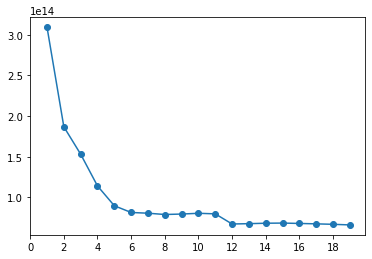

In [80]:
curve = pd.DataFrame(mse_val)
curve.index = np.arange(1, 20)

plt.plot(curve, '-o')
plt.xticks(range(0, 20, 2))

plt.show()

### Treinando os modelos

In [81]:
linear = LinearRegression().fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform').fit(X_train, y_train)

tree = DecisionTreeRegressor().fit(X_train, y_train)

### Testando os modelos

In [82]:
y_l = linear.predict(X_test)

y_n = neigh.predict(X_test)

y_t = tree.predict(X_test)

#### Indicadores

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [85]:
mse_l = mean_squared_error(y_test, y_l)
rss_l = calc_rss(y_test.values.ravel(), y_l)
r2_l = calc_r2(y_test, y_l)

mse_n = mean_squared_error(y_test, y_n)
rss_n = calc_rss(y_test.values.ravel(), y_n)
r2_n = calc_r2(y_test, y_n)

mse_t = mean_squared_error(y_test, y_t)
rss_t = calc_rss(y_test.values.ravel(), y_t)
r2_t = calc_r2(y_test, y_t)

In [86]:
print('Regressão linear:')
print(f'MSE = {mse_l}')
print(f'RSS = {rss_l}')
print(f'R^2 = {r2_l}')

print('Regressão KNN:')
print(f'MSE = {mse_n}')
print(f'RSS = {rss_n}')
print(f'R^2 = {r2_n}')

print('Árvore de regressão:')
print(f'MSE = {mse_t}')
print(f'RSS = {rss_t}')
print(f'R^2 = {r2_t}')

Regressão linear:
MSE = 2.0009306677060757e+29
RSS = 1.762016847225814e+33
R^2 = 0.9379870519487298
Regressão KNN:
MSE = 2.0086533865872243e+29
RSS = 1.779899363688427e+33
R^2 = 0.9386570308302756
Árvore de regressão:
MSE = 1.813667422653531e+29
RSS = 2.7205011339802966e+30
R^2 = 0.9486358142412984


#### Resíduos

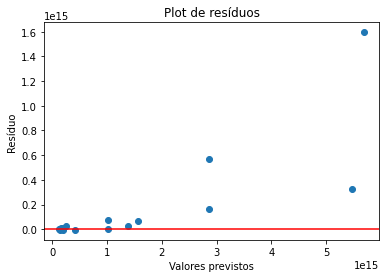

In [105]:
# y_pred = pd.DataFrame(y_t, columns=['preco'])
# residuals = y.subtract(y_pred, axis = 0)
residuals = y_test - y_n

# plt.figure(figsize=(13,7))
plt.scatter(y_n, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()

#### Valores p

In [106]:
import statsmodels.api as sm
from scipy import stats

In [107]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

In [108]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Economy   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     272.5
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           1.39e-26
Time:                        10:12:19   Log-Likelihood:                -1772.3
No. Observations:                  50   AIC:                             3551.
Df Residuals:                      47   BIC:                             3556.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.892e+15   8.74e+13     21.637      0.0

#### Variance Inflation Factor - VIF

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
X_df = pd.DataFrame(columns=['Public', 'Private'])

In [111]:
X_public = []
for i in range(50):
    X_public.append(X[i][0])

In [112]:
X_df['Public'] = X_public

In [113]:
X_private = []
for i in range(50):
    X_private.append(X[i][1])


In [114]:
X_df['Private'] = X_private

In [115]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i)
                          for i in range(len(X_df.columns))]
  
print(vif_data)

   feature        VIF
0   Public  17.910133
1  Private  17.910133


---

# Brasil

In [116]:
df_BRA = df_mult_values[df_mult_values.index.get_level_values(0)=='Brazil']
df_BRA.head()

Public.Value  Private.Value  Economy.Value
CountryName Year                                              
Brazil      1970.0  6.256171e+07   3.097460e+08   4.388201e+10
            1971.0  1.260172e+08   3.669270e+08   4.801289e+10
            1972.0  1.558517e+08   4.875410e+08   5.340986e+10
            1973.0  1.116170e+08   7.323483e+08   6.158197e+10
            1974.0  2.316899e+08   1.233883e+09   6.799576e+10

## Setor Público

In [117]:
X = df_BRA.loc[:,['Public.Value', 'Private.Value']]
y = df_BRA.loc[:,['Economy.Value']]

In [118]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
# x_scaled

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regressões

#### Procurando melhor número de vizinhos

In [120]:
mse_val = [] #to store rmse values for different k

for K in range(1, 20):
#     K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights='uniform')

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    error = mean_squared_error(y_test, pred)/K #calculate rmse
    mse_val.append(error) #store rmse values

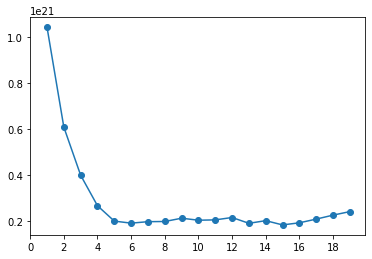

In [121]:
curve = pd.DataFrame(mse_val)
curve.index = np.arange(1, 20)

plt.plot(curve, '-o')
plt.xticks(range(0, 20, 2))

plt.show()

### Treinando os modelos

In [122]:
linear = LinearRegression().fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform').fit(X_train, y_train)

tree = DecisionTreeRegressor().fit(X_train, y_train)

### Testando os modelos

In [123]:
y_l = linear.predict(X_test)

y_n = neigh.predict(X_test)

y_t = tree.predict(X_test)

#### Indicadores

In [124]:
mse_l = mean_squared_error(y_test, y_l)
rss_l = calc_rss(y_test.values.ravel(), y_l)
r2_l = calc_r2(y_test, y_l)

mse_n = mean_squared_error(y_test, y_n)
rss_n = calc_rss(y_test.values.ravel(), y_n)
r2_n = calc_r2(y_test, y_n)

mse_t = mean_squared_error(y_test, y_t)
rss_t = calc_rss(y_test.values.ravel(), y_t)
r2_t = calc_r2(y_test, y_t)

In [125]:
print('Regressão linear:')
print(f'MSE = {mse_l}')
print(f'RSS = {rss_l}')
print(f'R^2 = {r2_l}')

print('Regressão KNN:')
print(f'MSE = {mse_n}')
print(f'RSS = {rss_n}')
print(f'R^2 = {r2_n}')

print('Árvore de regressão:')
print(f'MSE = {mse_t}')
print(f'RSS = {rss_t}')
print(f'R^2 = {r2_t}')

Regressão linear:
MSE = 2.0899078981611377e+21
RSS = 7.631675958698529e+24
R^2 = 0.8322972261818622
Regressão KNN:
MSE = 1.0060075207428534e+21
RSS = 9.378049112605893e+24
R^2 = 0.9501560311277624
Árvore de regressão:
MSE = 2.2925334951699343e+20
RSS = 3.438800242754901e+21
R^2 = 0.9898901399132707


#### Resíduos

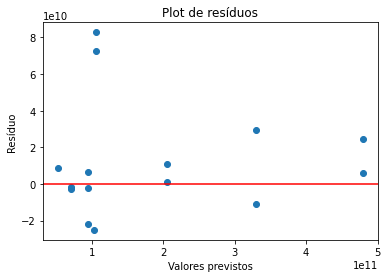

In [139]:
# y_pred = pd.DataFrame(y_n, columns=['preco'])
# residuals = y.subtract(y_pred, axis = 0)
residuals = y_test - y_n

# plt.figure(figsize=(13,7))
plt.scatter(y_n, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()

#### Valores p

In [127]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

In [128]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Economy.Value   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     119.3
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           3.85e-19
Time:                        10:13:02   Log-Likelihood:                -1317.5
No. Observations:                  50   AIC:                             2641.
Df Residuals:                      47   BIC:                             2647.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.145e+11   9.81e+09     21.858      0.0

#### Variance Inflation Factor - VIF

In [129]:
X_df = pd.DataFrame(columns=['Public', 'Private'])

In [130]:
X_public = []
for i in range(50):
    X_public.append(X[i][0])

In [131]:
X_df['Public'] = X_public

In [132]:
X_private = []
for i in range(50):
    X_private.append(X[i][1])

In [133]:
X_df['Private'] = X_private

In [134]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i)
                          for i in range(len(X_df.columns))]
  
print(vif_data)

   feature       VIF
0   Public  3.463945
1  Private  3.463945
